# Dataset exploration for training opitmization  - V1

## Context size

In [5]:
import os
from pathlib import Path
from datasets import load_from_disk
import seaborn as sns
import numpy as np

REPO_DIR = Path(os.path.dirname(os.getcwd())).parent
print(REPO_DIR)

/home/jeremy/projects/side_projects/rpg_assistant


In [2]:
dataset = load_from_disk(REPO_DIR / "data/fireball_tokenized")
dataset

Dataset({
    features: ['input_ids', 'attention_mask', 'length'],
    num_rows: 42527
})

In [3]:
n_tokens = [len(x) for x in dataset["input_ids"]]
print(f"{max(n_tokens) = }")

max(n_tokens) = 2788


<Axes: ylabel='Density'>

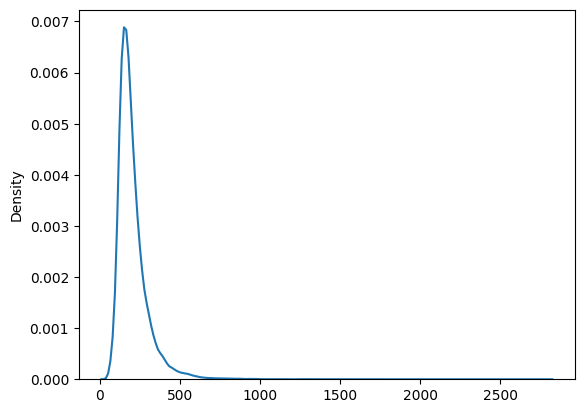

In [4]:
sns.kdeplot(n_tokens)

In [15]:
array = np.array(n_tokens)
print(f"% of samples above 1000 tokens: {array[array > 1000].size / array.size}")

% of samples above 1000 tokens: 0.0009405789263291556


As we can see, the maximal number of tokens is pretty high, but it represents only a minority of the data. Let's cut the data to 1000 max. That will increase significantly the training speed!

We also see that we can easily remove samples above 1000 tokens since they represent an infime portion of the data.